In [15]:
import os 
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm
os.chdir("/home/bumjin/fairseq/gradients")
os.listdir()

['grad7',
 'grad19',
 'grad6',
 'grad15',
 'grad14',
 'grad5',
 'grad8',
 'grad12',
 'grad21',
 'grad11',
 'grad13',
 'grad3',
 'grad18',
 'grad9',
 'analysis.ipynb',
 'grad17',
 'grad16',
 'grad4',
 'grad2',
 'grad1',
 'grad10',
 'grad20']

In [16]:
grad_dir = "grad18"
grad_files = os.listdir(grad_dir)
types =list(set([f[:f.find(".weight")] for f in grad_files]))
print(types)

['XtoV', 'mult_attn_y_lv.k_proj', 'XZtoV', 'mult_attn_y_lv.v_proj']


In [17]:
all_grads = {}
for type in types:
    grad_lst = [(int(f[f.find("weight_")+len("weight_"):-3]), f) for f in grad_files if f[:f.find(".weight")]==type]
    grad_lst = sorted(grad_lst, key=lambda x:x[0])
    all_grads[type]=grad_lst
print([len(all_grads[k]) for k in all_grads.keys()])

[46, 46, 46, 46]


In [18]:
all_grad_norm = []
for typ in types:
    grads = all_grads[typ]
    grad_norm = []
    for grad_file in tqdm(grads):
        try:
            g = torch.load(grad_dir+"/"+grad_file[1]).cuda(7)
            g = g.abs().mean().item()
            grad_norm.append(g)
        except:
            pass
    all_grad_norm.append(grad_norm)

100%|██████████| 46/46 [00:00<00:00, 418.81it/s]


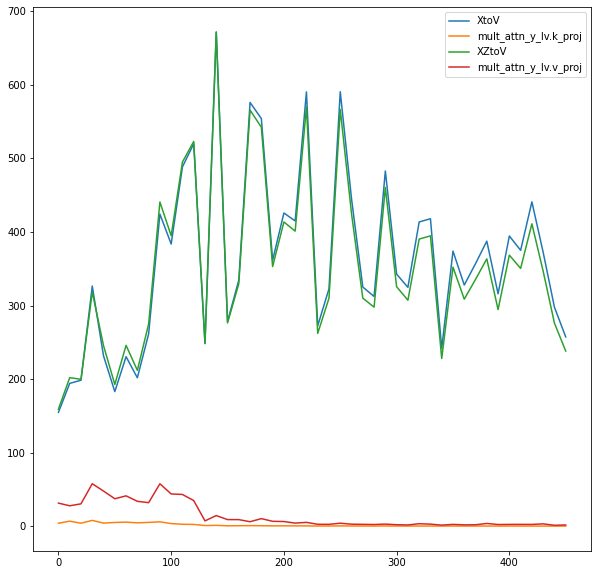

In [19]:
plt.figure(figsize=(10,10))
for i, typ in enumerate(all_grad_norm):
    if i not in [0,1,3,2]:
        continue
    plt.plot([i*10 for i in range(len(typ))], typ)
plt.legend(types)